In [1]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import itertools

In [2]:
data = pd.read_csv('2017.csv')

In [3]:
data['Happiness Normalised Score']=(data['Happiness.Score'] - data['Happiness.Score'].min())/(data['Happiness.Score'].max()-data['Happiness.Score'].min())

In [4]:
import matplotlib as mpl
import matplotlib.cm as cm

norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = cm.magma

In [5]:
m = cm.ScalarMappable(norm=norm, cmap=cmap)

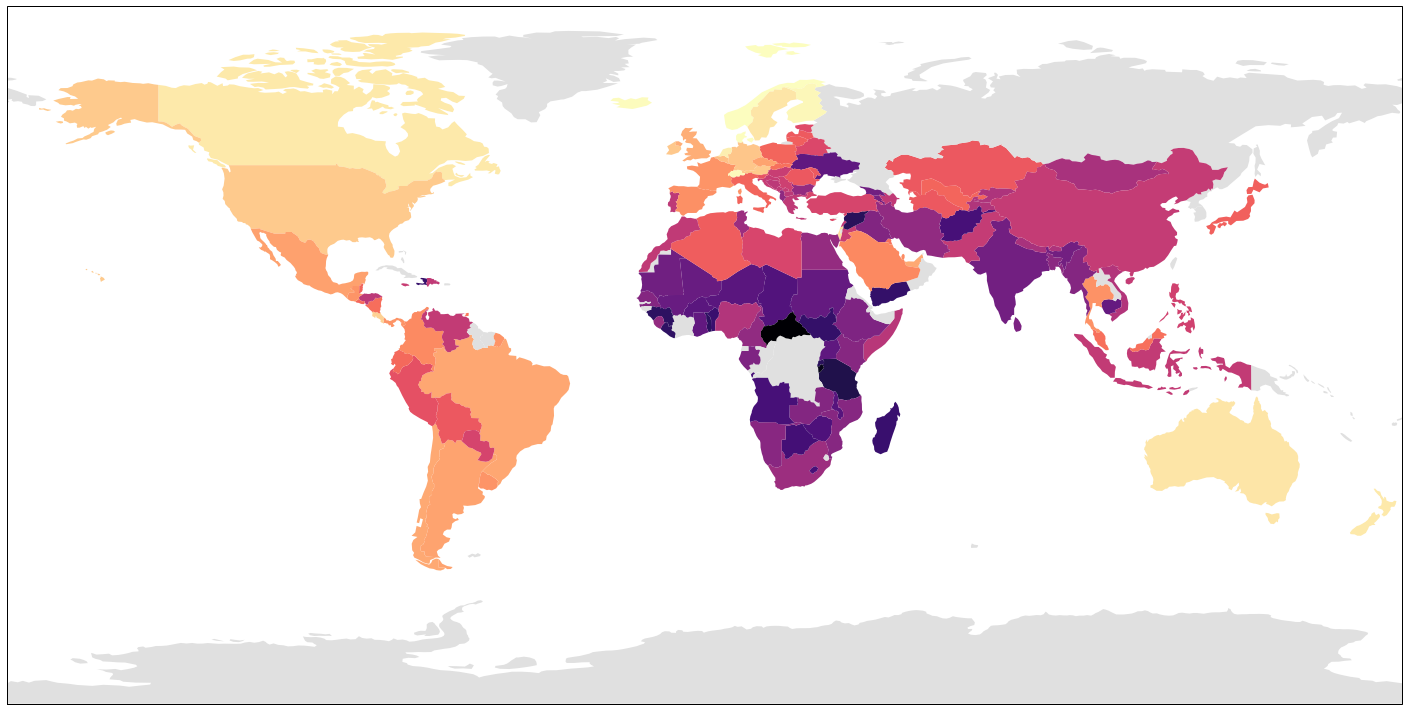

In [6]:
fig = plt.figure(figsize=(25, 25))
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)
country_list = list(data['Country'].values)
ax = plt.axes(projection=ccrs.PlateCarree())
for country in shpreader.Reader(countries_shp).records():
    if country.attributes['NAME_LONG'] in country_list:
        norm_val = list(data[data['Country']==country.attributes['NAME_LONG']]['Happiness Normalised Score'].values)
        
        
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
            facecolor=m.to_rgba(norm_val)[0][0:3],
            label=country.attributes['NAME_LONG'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
            facecolor=np.array([0.88,0.88,0.88]),
            label=country.attributes['NAME_LONG'])
        
plt.show()